In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
from sklearn.decomposition import PCA

In [796]:
X_1 = 2 + np.random.rand(100,1)
X_2 = np.random.rand(100,1)**2
X_3 = 20 + np.random.rand(100,1)
X_4 = np.random.rand(100,1)**3
X_5 = 5 + np.random.rand(100,1)
X_6 = 6 + np.random.rand(100,1)
X_7 = 4 * np.random.rand(100,1)
X_8 = 8 - np.random.rand(100,1)
X_9 = 3 / np.random.rand(100,1)
X_10 = 7 / np.random.rand(100,1)

y = X_4/3

In [797]:
X = np.c_[X_1, X_2, X_3, X_4, X_5, X_6, X_7, X_8, X_9, X_10]

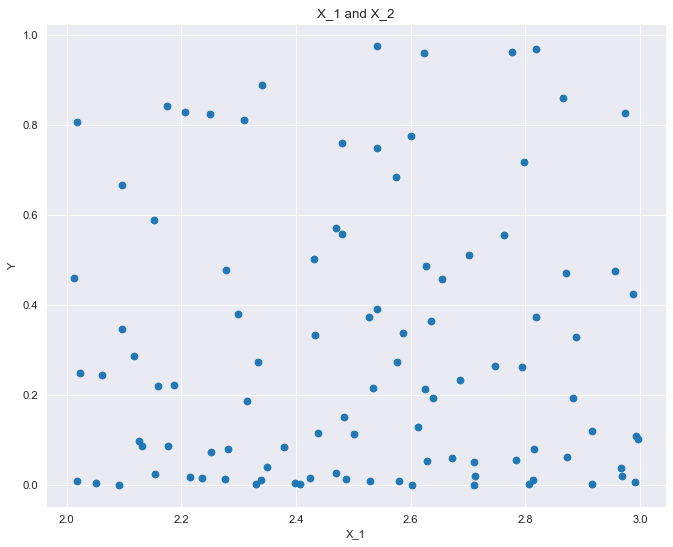

In [798]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and X_2')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X[:,0], X[:,1])
plt.show()

### Step 1: Subtract Mean

In [800]:
mean = np.mean(X, axis= 0)

In [801]:
mean

array([ 2.51488813,  0.30191372, 20.54424372,  0.25936   ,  5.4816575 ,
        6.4867878 ,  1.88091481,  7.50840705, 13.29096442, 24.71961867])

In [802]:
X_centered = X - mean
X_centered.shape

(100, 10)

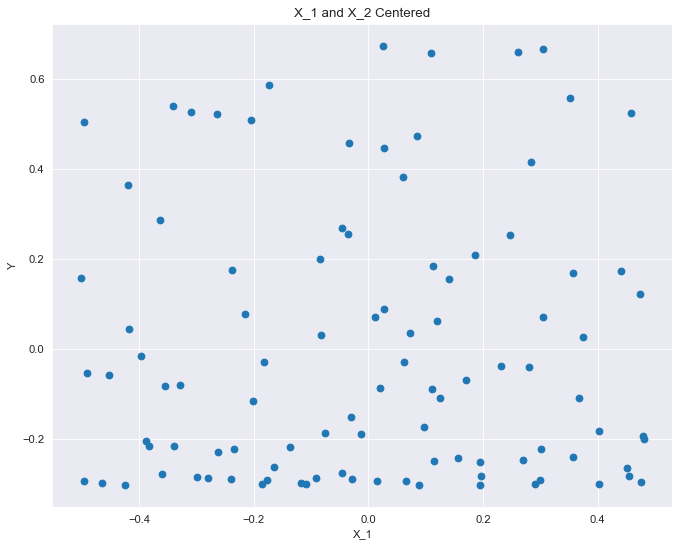

In [803]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('X_1 and X_2 Centered')
plt.xlabel('X_1')
plt.ylabel('Y')
plt.scatter(X_centered[:,0], X_centered[:,1])
plt.show()

### Calculate Covariance Matrix

In [804]:
X_centered.T.shape

(10, 100)

In [805]:
covarience_matrix = np.cov(X_centered, rowvar = False)

In [806]:
covarience_matrix.shape

(10, 10)

### Compute Eigen Vectors and Eigen Values of Covarience Matrix

In [807]:
eig_value, eig_vector = np.linalg.eig(covarience_matrix.T)

In [808]:
eig_vector.shape

(10, 10)

In [809]:
eig_value.shape

(10,)

In [810]:
eig_value

array([1.18406686e+03, 5.21515856e+02, 1.13734447e+00, 5.22057911e-02,
       6.07724662e-02, 7.48895087e-02, 7.35820072e-02, 8.44439168e-02,
       9.41338772e-02, 9.20596835e-02])

In [811]:
eig_value_sorted

array([2.14216418e+05, 8.37702706e+03, 1.33083838e+00, 1.24057915e-01,
       1.01812824e-01, 9.36949830e-02, 8.71196991e-02, 7.32897839e-02,
       5.59105941e-02, 4.84976454e-02])

### Short Eigen Vectors by Eigen Value

In [812]:
idx = eig_value.argsort()
#sort descending orer
eig_value_sorted = eig_value[idx[::-1]]
eig_vector_sorted = eig_vector[idx[::-1]]

In [813]:
[-2.36817330e-06, -2.32407134e-04,  4.29444780e-02,
         3.23126890e-01, -3.23080437e-01,  7.63994478e-01,
         1.79263084e-01, -2.76635056e-01,  3.11095580e-01,
         1.52817644e-02]

[-2.3681733e-06,
 -0.000232407134,
 0.042944478,
 0.32312689,
 -0.323080437,
 0.763994478,
 0.179263084,
 -0.276635056,
 0.31109558,
 0.0152817644]

### Compute Explained Variance

In [814]:
explained_var = eig_value_sorted/sum(eig_value_sorted)
component = ["comp1", "comp2", "comp3", "comp4", "comp5","comp6", "comp7", "comp8", "comp9", "comp10"]
list(zip(component, list(explained_var)))

[('comp1', 0.693551249563571),
 ('comp2', 0.3054709032441524),
 ('comp3', 0.000666184236655284),
 ('comp4', 5.513765337535499e-05),
 ('comp5', 5.392272229703558e-05),
 ('comp6', 4.946188928098201e-05),
 ('comp7', 4.3865523202507104e-05),
 ('comp8', 4.30996717212782e-05),
 ('comp9', 3.559665525832325e-05),
 ('comp10', 3.0578840485906924e-05)]

### Transform Data Using Eigen Vector

In [815]:
X_transformed = np.dot(X_centered, eig_vector)

In [816]:
X_transformed.shape

(100, 10)

In [817]:
X_transformed_shorted = X_transformed[:,idx[::-1]]

In [818]:
X_transformed_shorted.shape

(100, 10)

Let's plot the first two principal components, which should have the most explained variance.

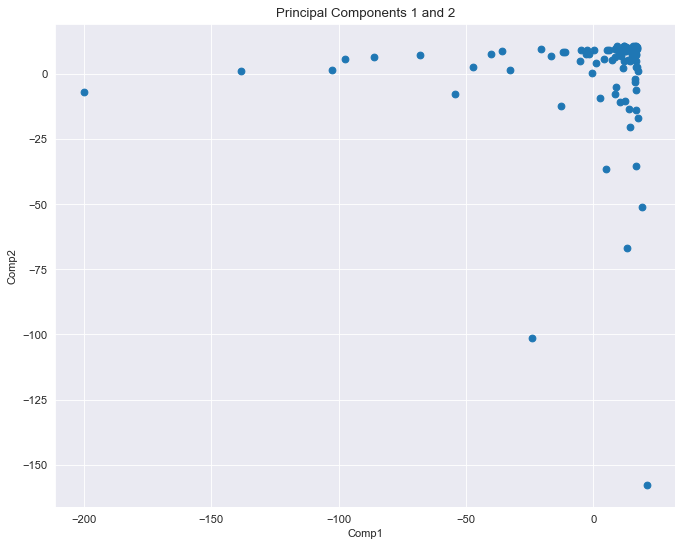

In [819]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 1 and 2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_transformed_shorted[:,0], X_transformed_shorted[:,1])
plt.show()

Now, let's plot the 9th and 10th components, which should have the least variance. 

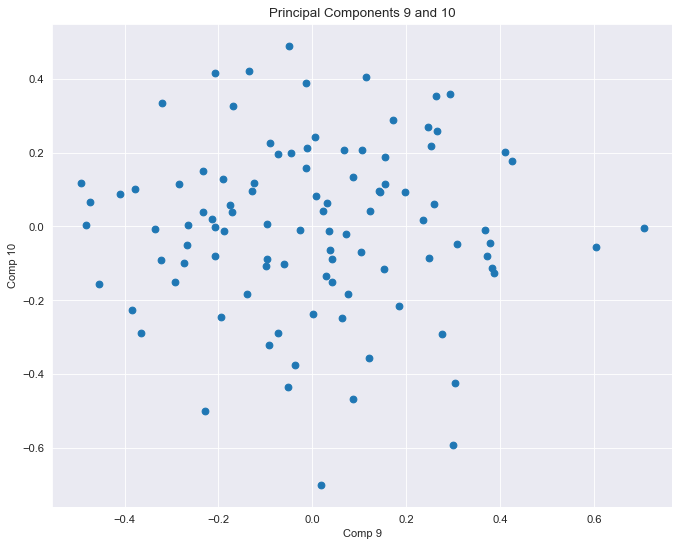

In [820]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp 9')
plt.ylabel('Comp 10')
plt.scatter(X_transformed_shorted[:,8], X_transformed_shorted[:,9])
plt.show()

### Reconstruct Original Data

= PCA_scores.dot(Eigenvectors.T) + mean

In [821]:
X[:,0]

array([2.68548493, 2.46896047, 2.67175333, 2.99595088, 2.30954281,
       2.888941  , 2.12663259, 2.81891556, 2.65524848, 2.99308313,
       2.2060098 , 2.7944831 , 2.52906324, 2.15471118, 2.88270009,
       2.47940669, 2.43268062, 2.98811915, 2.23554033, 2.33799044,
       2.76235464, 2.50113522, 2.57453511, 2.21520793, 2.17423231,
       2.52723225, 2.78404827, 2.7766833 , 2.01262847, 2.40680372,
       2.17622673, 2.79805801, 2.60019969, 2.06193443, 2.87220426,
       2.81543862, 2.87175513, 2.9165675 , 2.60257565, 2.9663636 ,
       2.7014556 , 2.34946812, 2.09663155, 2.29898721, 2.8662072 ,
       2.43905385, 2.15929421, 2.39754776, 2.33304071, 2.81925634,
       2.32936442, 2.01822752, 2.58689688, 2.80616062, 2.54045777,
       2.46911252, 2.48019481, 2.27532955, 2.95607877, 2.2806573 ,
       2.97331335, 2.62879643, 2.25061654, 2.62342225, 2.09609653,
       2.05017852, 2.62507788, 2.42379793, 2.91658811, 2.81421983,
       2.54176292, 2.34126382, 2.96930031, 2.6120321 , 2.11798

In [822]:
X_reconstruct = X_transformed.dot(eig_vector.T) + mean
X_reconstruct[:,0]

array([2.68548493, 2.46896047, 2.67175333, 2.99595088, 2.30954281,
       2.888941  , 2.12663259, 2.81891556, 2.65524848, 2.99308313,
       2.2060098 , 2.7944831 , 2.52906324, 2.15471118, 2.88270009,
       2.47940669, 2.43268062, 2.98811915, 2.23554033, 2.33799044,
       2.76235464, 2.50113522, 2.57453511, 2.21520793, 2.17423231,
       2.52723225, 2.78404827, 2.7766833 , 2.01262847, 2.40680372,
       2.17622673, 2.79805801, 2.60019969, 2.06193443, 2.87220426,
       2.81543862, 2.87175513, 2.9165675 , 2.60257565, 2.9663636 ,
       2.7014556 , 2.34946812, 2.09663155, 2.29898721, 2.8662072 ,
       2.43905385, 2.15929421, 2.39754776, 2.33304071, 2.81925634,
       2.32936442, 2.01822752, 2.58689688, 2.80616062, 2.54045777,
       2.46911252, 2.48019481, 2.27532955, 2.95607877, 2.2806573 ,
       2.97331335, 2.62879643, 2.25061654, 2.62342225, 2.09609653,
       2.05017852, 2.62507788, 2.42379793, 2.91658811, 2.81421983,
       2.54176292, 2.34126382, 2.96930031, 2.6120321 , 2.11798

### Compare results to PCA via Sklearn

In [823]:
pca = PCA(n_components=10)

In [824]:
pca.fit(X)

PCA(n_components=10)

In [825]:
eig_vector_sorted.T[:,0]

array([ 0.00176473, -0.00069244,  0.00259896,  0.00258441,  0.48566943,
       -0.54170097,  0.12554692,  0.62097813,  0.25923182, -0.04573001])

In [826]:
pca.components_[:,0]

array([-0.00176473,  0.00069244, -0.00259896,  0.25923182, -0.04573001,
       -0.62097813, -0.54170097, -0.12554692,  0.48566943, -0.00258441])

In [827]:
X_pca = pca.transform(X)
X_pca.shape

(100, 10)

In [828]:
#our explaiend variance
list(zip(component, list(explained_var)))

[('comp1', 0.693551249563571),
 ('comp2', 0.3054709032441524),
 ('comp3', 0.000666184236655284),
 ('comp4', 5.513765337535499e-05),
 ('comp5', 5.392272229703558e-05),
 ('comp6', 4.946188928098201e-05),
 ('comp7', 4.3865523202507104e-05),
 ('comp8', 4.30996717212782e-05),
 ('comp9', 3.559665525832325e-05),
 ('comp10', 3.0578840485906924e-05)]

In [829]:
#function explained variance
pca.explained_variance_ratio_

array([6.93551250e-01, 3.05470903e-01, 6.66184237e-04, 5.51376534e-05,
       5.39227223e-05, 4.94618893e-05, 4.38655232e-05, 4.30996717e-05,
       3.55966553e-05, 3.05788405e-05])

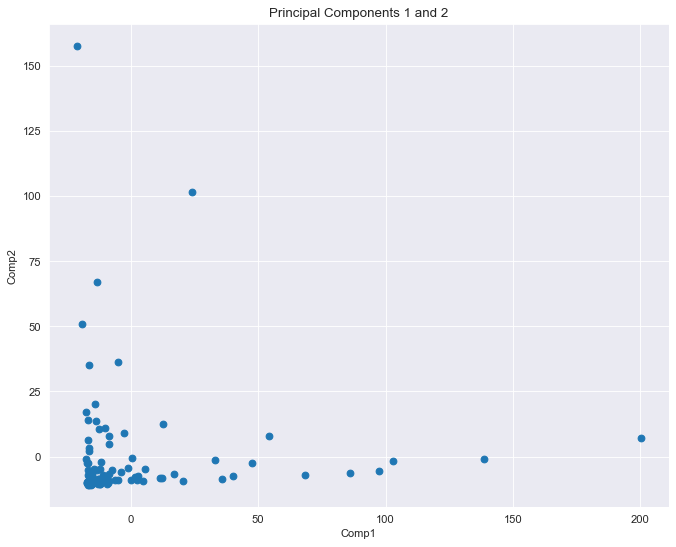

In [830]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 1 and 2')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_pca[:,0], X_pca[:,1])
plt.show()

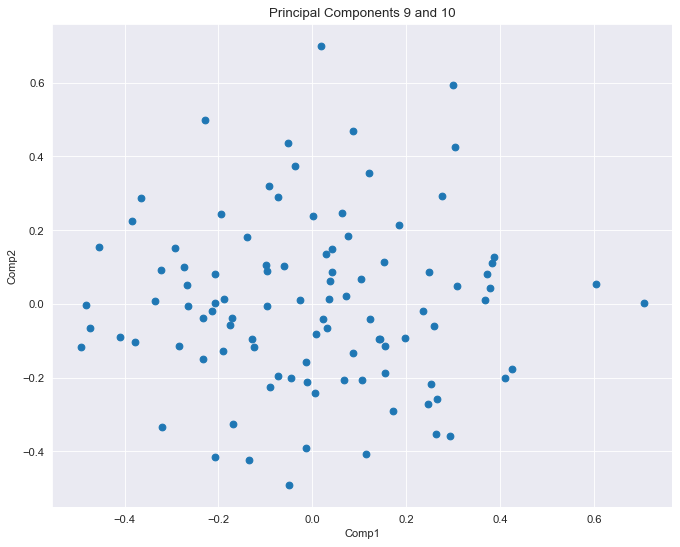

In [831]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_pca[:,8], X_pca[:,9])
plt.show()

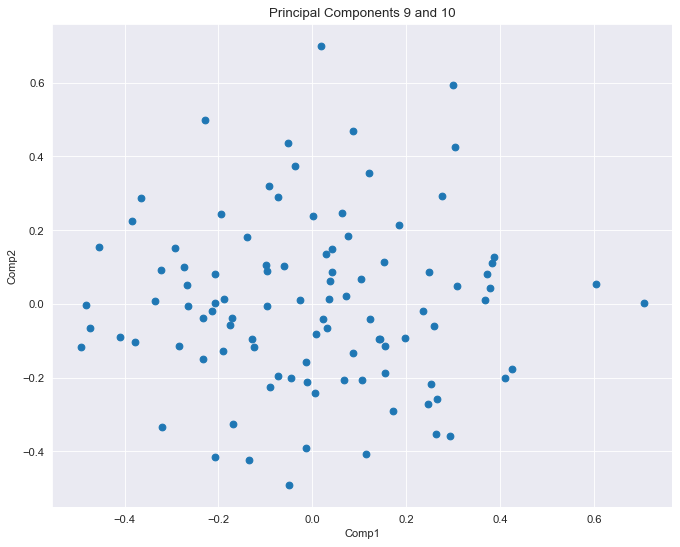

In [832]:
figure(figsize=(10, 8), dpi=80)

sns.set_style("darkgrid")
plt.title('Principal Components 9 and 10')
plt.xlabel('Comp1')
plt.ylabel('Comp2')
plt.scatter(X_transformed_shorted[:,8], X_transformed_shorted[:,9]*-1)
plt.show()

In [833]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()

In [837]:
lr.fit(X_transformed_shorted[:,0:1].reshape(100,1),  y)

LinearRegression()

In [838]:
pred_1 = lr.predict(X_transformed_shorted[:,0:1].reshape(100,1))

In [839]:
r2_score(y, pred_1)

0.015796996054550427